# Task1:  
Develop a function to test the normality of a data sample distribution using the template provided in the homework materials.You may use one of the well-known statistical tests.

In [ ]:
!pip install scipy
from scipy.stats import normaltest

In [ ]:
def check_normality(data):
  # Conducting the D'Agostino-Pearson test
  stat, p_value = normaltest(data)
  alpha = 0.05

  # Checking the condition of statistical significance
  if p_value < alpha:
    print("Rejecting the null hypothesis >> The data are not normally distributed")
  else:
    print("Confirming the null hypothesis >> The data are normally distributed")

#Task2:

Two samples of heights for men and women are given.
Prove, using the Student's t-test, that the difference between the samples is insignificant if the significance level is α = 0.001. Show the differences visually.

Is the result practically useful? Why or why not?

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

men = stats.norm.rvs(loc=171, scale=10, size=150000)
women = stats.norm.rvs(loc=170, scale=10, size=150000)

In [ ]:
f_stat = np.var(men, ddof=1) / np.var(women, ddof=1)
df1 = len(men) - 1
df2 = len(women) - 1
p_value_f = stats.f.cdf(f_stat, df1, df2) if f_stat < 1 else 1 - stats.f.cdf(1 / f_stat, df2, df1)
f_stat, p_value_f

(1.0022561885767192, 0.6687320536738423)

The value 1.002 indicates that the variances of the male and female samples are nearly equal, as the ratio is close to 1.The p-value of 0.669 is significantly greater than the standard significance level 0.05. This means there is no basis to reject the null hypothesis of equal variances.

In [ ]:
t_stas, p_value = stats. ttest_ind(men, women, equal_var=False)
t_stas, p_value

(28.313635693327363, 4.013051963718138e-176)

In [ ]:
alpha = 0.001

if p_value < alpha:
  print("Rejecting the null hypothesis >> The heights of men and women differ significantly.")
else:
  print("Confirming the null hypothesis >> The difference in height between men and women is not significant.")

Rejecting the null hypothesis >> The heights of men and women differ significantly.


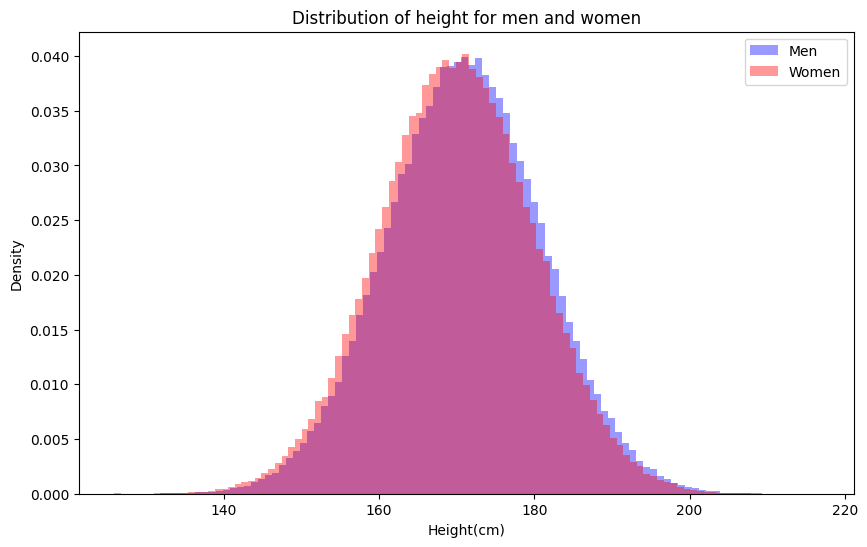

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(men, bins=100, alpha=0.4, label='Men', color='blue', density=True)
plt.hist(women, bins=100, alpha=0.4, label='Women', color='red', density=True)
plt.xlabel("Height(cm)")
plt.ylabel("Density")
plt.legend()
plt.title("Distribution of height for men and women")
plt.show()

Although we reject the null hypothesis, the graph shows that the differences in height are small and have little practical significance.

#Task3:
A human resources specialist working in a technology company is interested in the overtime hours of different teams. To determine if there is a difference between the overtime work of the software development team and the testing group, she randomly selected 17 employees from each of the two teams and recorded their average weekly overtime in hours. The data are provided below.

Based on this information, conduct a hypothesis test to check if there is a difference in the overtime between the two teams, using a significance level of 0.05. Before conducting the hypothesis test, check the assumption of normality.

In [ ]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

The null hypothesis (H0): The average amount of overtime is the same across the teams.

The alternative hypothesis (H1): The average amount of overtime differs between the teams.

Normality test using the Shapiro-Wilk test:

In [ ]:
alpha = 0.05
# for test_team
stat_test, p_value_test = stats.shapiro(test_team)
p_value_test

0.004620073473463519

In [ ]:
if p_value_test > alpha:
  print("Accept the null hypothesis: the data are normally distributed for the testing team.")
else:
  print("We reject the null hypothesis: the data are not normally distributed for the testing team.")

We reject the null hypothesis: the data are not normally distributed for the testing team.


In [ ]:
# for developer_team
stat_dev, p_value_dev = stats.shapiro(developer_team)
p_value_dev

0.000489113275069916

In [ ]:
if p_value_dev > alpha:
  print("Accept the null hypothesis: the data are normally distributed for the development team.")
else:
  print("We reject the null hypothesis: the data are not normally distributed for the development team.")


We reject the null hypothesis: the data are not normally distributed for the development team.


**We use the Mann-Whitney test since the datas are not normally distributed.**

In [ ]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(test_team, developer_team)
stat, p_value

(151.5, 0.8226484074918565)

In [ ]:
if p_value < alpha:
  print("We reject the null hypothesis: there is a significant difference between the teams.")
else:
  print("We accept the null hypothesis: there is no significant difference between the teams.")

We accept the null hypothesis: there is no significant difference between the teams.


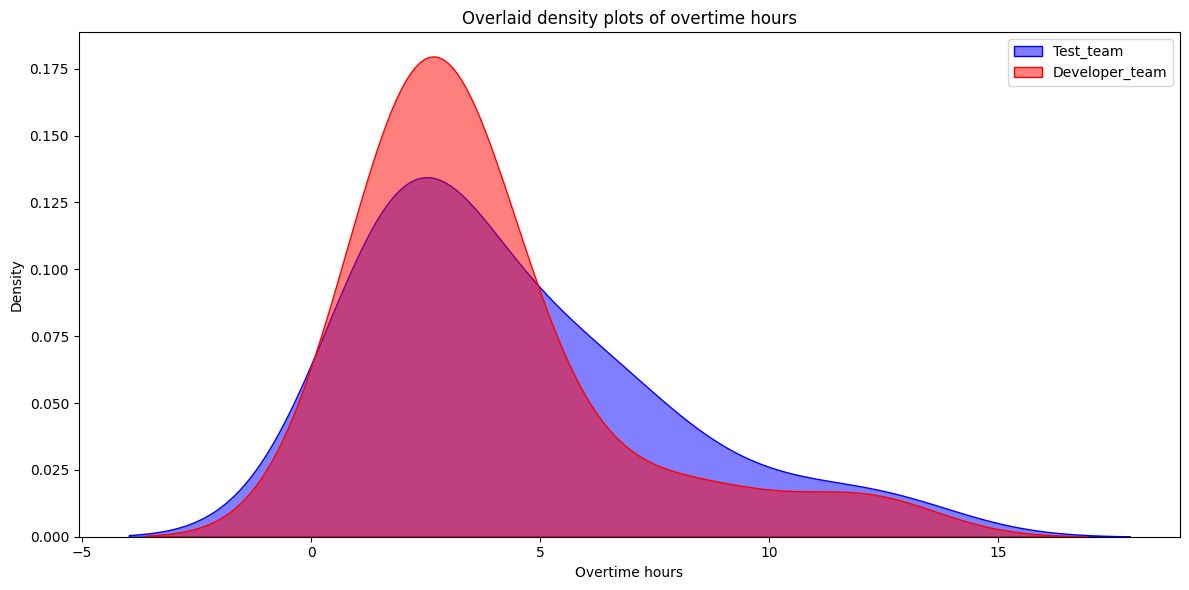

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.kdeplot(test_team, fill=True, label='Test_team', color='blue', alpha=0.5)
sns.kdeplot(developer_team, fill=True, label='Developer_team', color='red', alpha=0.5)
plt.xlabel("Overtime hours")
plt.ylabel("Density")
plt.legend()
plt.title("Overlaid density plots of overtime hours")

plt.tight_layout()
plt.show()

# Task4:
A pediatrician wants to observe the impact of formula consumption on the average monthly weight gain of newborns. For this reason, she collected data from three different groups. The first group consists of exclusively breastfed infants, the second group includes infants fed only with formula, and the last group consists of infants who are both formula-fed and breastfed. The data are provided below.

Based on this information, conduct a hypothesis test to determine if there is a difference in the average monthly weight gain among these three groups, using a significance level of 0.05. If a significant difference is found, conduct further analysis to identify the cause of the difference.

In [ ]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

The null hypothesis (H0): There is no significant difference in the average monthly weight gain of newborns across the three groups.
The alternative hypothesis (H1): There is a significant difference between at least one pair of groups.

In [ ]:
f_statistic, p_value = stats.f_oneway(only_breast, only_formula, both)
f_statistic, p_value

(26.701251857537958, 7.18623550288582e-09)

In [ ]:
alpha = 0.05
if p_value < alpha:
  print("We reject the null hypothesis: there is a significant difference between the groups.")
else:
  print("We accept the null hypothesis: there is no significant difference between the groups.")


We reject the null hypothesis: there is a significant difference between the groups.


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = only_breast + only_formula + both
groups = (['only_breast'] * len(only_breast) +
          ['only_formula'] * len(only_formula) +
          ['both'] * len(both))

tukey = pairwise_tukeyhsd(endog=data, groups=groups, alpha=0.05)
tukey

In [ ]:
tukey_results = tukey.summary()
tukey_results_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
tukey_results_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,both,only_breast,-60.1286,0.0995,-129.1485,8.8912,False
1,both,only_formula,149.2636,0.0000,82.3651,216.1621,True
2,only_breast,only_formula,209.3923,0.0000,137.3508,281.4337,True


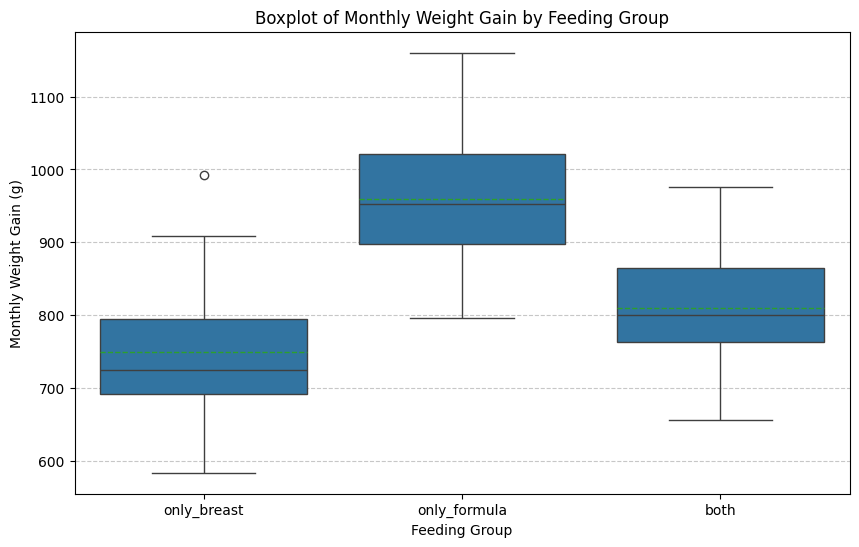

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame({'Weight Gain': data, 'Group': groups})
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Weight Gain', data=df, showmeans=True, meanline=True)
plt.title('Boxplot of Monthly Weight Gain by Feeding Group')
plt.xlabel('Feeding Group')
plt.ylabel('Monthly Weight Gain (g)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

It is evident that weight gain with formula feeding is higher than with other types of feeding.

# Task5:
A financial investment company analyst is interested in the relationship between gender and risk tolerance. A random sample of 660 clients was taken from the database. The clients in the sample were classified according to their gender and risk tolerance. The results are shown in the following table.

Test the hypothesis that clients' risk tolerance in this company is independent of their gender. Use α = 0.01.

In [ ]:
import pandas as pd

In [ ]:
contingency_table = pd.DataFrame(
    [
        [53, 23, 30, 36, 88],
        [71, 48, 51, 57, 203]
    ],
    #columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['W', 'M'])

print('Risk level')
print(contingency_table)

Risk level
    0   1   2   3    4
W  53  23  30  36   88
M  71  48  51  57  203


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
chi2, p_value, dof, expected

(7.094218206100441,
 0.13099220858734012,
 4,
 array([[ 43.21212121,  24.74242424,  28.22727273,  32.40909091,
         101.40909091],
        [ 80.78787879,  46.25757576,  52.77272727,  60.59090909,
         189.59090909]]))

At a significance level of α = 0.01, the p-value (0.131) is greater than α. This means that we have no basis to reject the null hypothesis. Risk propensity does not depend on the gender of the company's clients.

# Task6:
An e-commerce company regularly advertises its campaigns on YouTube, Instagram, and Facebook. However, the new manager was curious to find out whether there is a difference in the number of customers attracted by these platforms. Therefore, she started using Adjust, an application that allows you to track where your users come from. The daily figures reported by Adjust for each platform are provided below.

Based on this information, conduct a hypothesis test to determine if there is a difference in the average number of customers attracted by these three platforms using a significance level of 0.05. If there is a significant difference, perform further analysis to identify the cause of the difference. Before proceeding with the hypothesis test, check the relevant assumptions.

In [ ]:
youtube=[1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]
instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]
facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]

In [ ]:
from scipy.stats import kruskal
kruskal_test = kruskal(youtube, instagram, facebook)
kruskal_test

KruskalResult(statistic=22.193539319674137, pvalue=1.5161220700704243e-05)

Since the p-value is significantly less than the significance level of 0.05, we reject the null hypothesis. This indicates that there are statistically significant differences between the platforms in the average number of customers attracted.

In [ ]:
from scipy.stats import mannwhitneyu
result_facebook_instagram = mannwhitneyu(facebook, instagram, alternative='two-sided')
result_facebook_youtube = mannwhitneyu(facebook, youtube, alternative='two-sided')
result_instagram_youtube = mannwhitneyu(instagram, youtube, alternative='two-sided')

print("Facebook vs Instagram:", result_facebook_instagram)
print("Facebook vs YouTube:", result_facebook_youtube)
print("Instagram vs YouTube:", result_instagram_youtube)

Facebook vs Instagram: MannwhitneyuResult(statistic=106.0, pvalue=0.8034625743147712)
Facebook vs YouTube: MannwhitneyuResult(statistic=194.0, pvalue=0.0007791503482085242)
Instagram vs YouTube: MannwhitneyuResult(statistic=225.0, pvalue=3.3833394126542183e-06)


Facebook vs YouTube p < 0.05 means the difference is considered statistically significant.